# Step One: Import CSV file
1. Picked a CSV from Kaggle: Bechdel Cast Data
2. The CSV contains pass or fail for the Bechdel Test: a measure of the representation of women in fiction. It asks whether a work features at least two women who talk to each other about something other than a man. The requirement that the two women must be named is sometimes added.
3. The dataset contains pertinent information such as the movie name, the weekly guest's name, the date it aired, the genre of the movie, whether it passed the Bechdel test, and the nipple rating for each host and guest, as well as the average rating for the movie that they discussed that episode.

In [2]:
#had to move the csv file to the same folder

import pandas as pd
df = pd.read_csv('BechdelCastData.csv')
# Prints how pd will structure data types
print(df.dtypes)

episode                                 int64
date_aired                             object
title                                  object
guest_name                             object
bechdel_test                           object
Nipple_Rating_Durante_Loftus_Guest     object
total_nipples                          object
durante                               float64
loftus                                float64
guest                                 float64
main_genre                             object
genre                                  object
average_rating                        float64
host_average                          float64
dtype: object


# Step two: note any preliminary trends in the CSV as a dataframe
1. The first cell organizes the data by pass/fail of the Bechdel Test
2. The second cell looks for the "passes"

In [3]:
#Setting parameter of Bechdel test pass/fail
df = pd.read_csv('BechdelCastData.csv')
df = df.set_index('bechdel_test')
df.head()

,episode,date_aired,title,guest_name,Nipple_Rating_Durante_Loftus_Guest,total_nipples,durante,loftus,guest,main_genre,genre,average_rating,host_average
bechdel_test,,,,,,,,,,,,,
No,3,8-Dec-16,Beauty and the Beast (1991),Courtney Karwal,2 (L)[1],NaN,NaN,2.0,NaN,Fantasy,"Animation, fantasy",2.000000,2.00
No,4,15-Dec-16,Star Wars: A New Hope,Sam Jay,2 (D); 1 (L); 1.5 (G),4.5,2.0,1.0,1.5,Sci-fi,"Sci-fi, action",1.500000,1.50
Yes,5,22-Dec-16,Love Actually,Debra DiGiovanni,.5 (D); .5 (L); .5 (G),1.5,0.5,0.5,0.5,Rom-com,"Rom-com, christmas",0.500000,0.50
Yes,6,29-Dec-16,The Matrix,Matt Donaher,3.5 (D); 3 (L)[2]; 3 (G),9.5,3.5,3.0,3.0,Sci-fi,"Sci-fi, action",3.166667,3.25
Yes,7,5-Jan-17,Labyrinth,Jenny Zigrino,1.5 (D); 2 (L); 3 (G),6.5,1.5,2.0,3.0,Fantasy,"Fantasy, musical",2.166667,1.75


In [4]:
#pass=yes
df.loc['Yes'].head()

,episode,date_aired,title,guest_name,Nipple_Rating_Durante_Loftus_Guest,total_nipples,durante,loftus,guest,main_genre,genre,average_rating,host_average
bechdel_test,,,,,,,,,,,,,
Yes,5,22-Dec-16,Love Actually,Debra DiGiovanni,.5 (D); .5 (L); .5 (G),1.5,0.50,0.5,0.5,Rom-com,"Rom-com, christmas",0.500000,0.500
Yes,6,29-Dec-16,The Matrix,Matt Donaher,3.5 (D); 3 (L)[2]; 3 (G),9.5,3.50,3.0,3.0,Sci-fi,"Sci-fi, action",3.166667,3.250
Yes,7,5-Jan-17,Labyrinth,Jenny Zigrino,1.5 (D); 2 (L); 3 (G),6.5,1.50,2.0,3.0,Fantasy,"Fantasy, musical",2.166667,1.750
Yes,9,19-Jan-17,Mad Max: Fury Road,Will Weldon,3.75 (D); 3 (L); 4 (G),10.75,3.75,3.0,4.0,Action,"Action, post-apocalytic",3.583333,3.375
Yes,10,26-Jan-17,Fargo,Julia Prescott,4.5 (D); 4.5 (L); 4.5 (G),13.5,4.50,4.5,4.5,Thiller,"Thiller, black comedy",4.500000,4.500


# Step Three: break down at least two different subsets of data
1. My first cell groups by genre
2. Then only pull thiller
3. I struggled pulling "thrillers" but realized it was because the CSV had "thiller" instead of "thriller"
4. My second cell expands by comparing how many films passed or failed the bechdel test in each genre

In [5]:
genre = df.groupby('main_genre')
genre.get_group('Thiller').head()

,episode,date_aired,title,guest_name,Nipple_Rating_Durante_Loftus_Guest,total_nipples,durante,loftus,guest,main_genre,genre,average_rating,host_average
bechdel_test,,,,,,,,,,,,,
Yes,10,26-Jan-17,Fargo,Julia Prescott,4.5 (D); 4.5 (L); 4.5 (G),13.5,4.5,4.5,4.5,Thiller,"Thiller, black comedy",4.500000,4.5
Yes,15,2-Mar-17,Single White Female,Ben Rodgers,4 (D); 4 (L); 4 (G),12,4.0,4.0,4.0,Thiller,"Thiller, psychological, erotic",4.000000,4.0
No,84,7-Jun-18,Ocean's Eleven,Edgar Momplaisir,0 (D); 0 (L); 5 (G),5,0.0,0.0,5.0,Thiller,"Thiller, heist",1.666667,0.0
Yes,120,31-Jan-19,Fatal Attraction,Soraya Chemaly,0 (D); 0 (L); 0 (G),0,0.0,0.0,0.0,Thiller,Thriller,0.000000,0.0


In [6]:
#the goal was to count how many film titles passed or failed the bechdel test by genre
nipple_bechdel_comparison = df.groupby(['main_genre','bechdel_test'])['title'].count()
nipple_bechdel_comparison.head()

main_genre  bechdel_test
Action      No              16
            Yes             17
Adventure   No               2
            Yes              2
Animated    Yes              1
Name: title, dtype: int64

# Step four: Plot a comparison between the grouped data

bechdel_test
No         AxesSubplot(0.125,0.125;0.775x0.755)
Yes        AxesSubplot(0.125,0.125;0.775x0.755)
Yes/No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes/Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: title, dtype: object

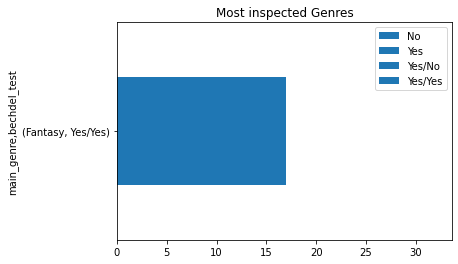

In [12]:
#visual representation of how many passed and how many failed in data set (overall)
nipple_bechdel_comparison.groupby(['bechdel_test']).plot(kind="barh", title="Most inspected Genres", legend=True)

# Step five: Extra visualization
I spent soem time trying to do a double bar graph for the "yes" and no" of the Bechdel Pass/test fail. I would have liked to compare the yes vs the no across genres, but could not get anything to work. I settled for a bar group visualizing how many films were inspected within the included genres.

<AxesSubplot:title={'center':'Most inspected Genres'}>

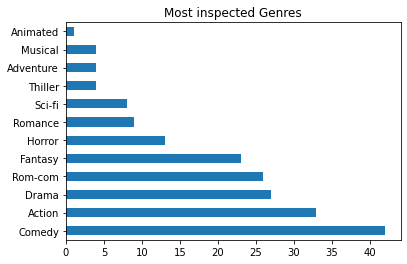

In [8]:
df['main_genre'].value_counts()[:20].plot(kind="barh", title="Most inspected Genres")